In [1]:
# Imports and Helper Functions
# data Analysis
import pandas as pd
import numpy as np
import random as rng
from datetime import datetime

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid') 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
raw_data = pd.read_csv("data/data.csv")
data = raw_data.copy(True)

In [3]:
fighters = pd.read_csv("data/fighters.csv")
categories_data = pd.read_csv("data/categories.csv")
fighter_mean = pd.read_csv("data/fighter_means.csv")
data_edited = pd.read_csv("data/data_edited.csv")
data_cleaned = pd.read_csv("data/cleaned_data.csv")
data_deture = pd.read_csv("data/data_with_features.csv")

In [20]:
data.shape

(2318, 894)

In [4]:
data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.00,193.00,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.00,172.00,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.00,167.00,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.00,167.00,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.00,185.00,Southampton England,2005,Southampton England,Tom Watson,84.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [ ]:
data.info()

In [5]:
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,"2,318.00","2,318.00","2,301.00","2,301.00","2,318.00","2,306.00","1,647.00","1,647.00","1,647.00","1,647.00",...,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00
mean,2.39,0.74,31.78,177.33,"2,120.00",73.70,0.07,1.10,0.58,3.85,...,251.41,33.64,64.90,6.86,3.98,4.30,12.01,262.74,4.38,303.10
std,2.54,1.15,4.17,8.81,705.09,15.43,0.31,1.54,1.05,5.26,...,197.59,75.76,100.52,25.79,13.04,12.81,39.17,199.94,20.94,224.85
min,0.00,0.00,20.00,152.00,129.00,52.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,29.00,172.00,"1,910.25",61.00,0.00,0.00,0.00,0.00,...,137.00,0.00,0.00,0.00,0.00,0.00,0.00,137.00,0.00,178.00
50%,2.00,0.00,31.00,177.00,"2,230.00",70.00,0.00,1.00,0.00,2.00,...,222.00,0.00,10.00,0.00,0.00,0.00,0.00,258.50,0.00,296.50
75%,4.00,1.00,35.00,182.00,"2,709.00",84.00,0.00,2.00,1.00,5.00,...,299.00,34.00,98.00,0.00,0.00,0.00,2.00,300.00,0.00,364.00
max,14.00,10.00,48.00,213.00,"3,196.00",120.00,3.00,13.00,8.00,47.00,...,"1,259.00",633.00,666.00,144.00,91.00,62.00,273.00,"1,291.00",200.00,"1,473.00"


In [ ]:
data.describe(include=['object']) 

In [11]:
#mala slova imena
data['R_Name'] = data['R_Name'].str.lower()
data['B_Name'] = data['B_Name'].str.lower()

In [ ]:

#nan vrijednosti u winby stupcu
no_winby = data[data['winby'].isnull()]
print(len(no_winby), "rows where 'winby' is not set.")

print(data['winner'][data['winner'] == 'no contest'].size, 'no contests')
print(data['winner'][data['winner'] == 'draw'].size, 'draws')

print(no_winby['winner'][no_winby['winner'] == 'draw'].size, 'draws with an empty \'winby\' value')
print(no_winby['winner'][no_winby['winner'] == 'no contest'].size, 'no contest with an empty \'winby\' value')

#every draw counts for an empty winby, but not every "no contest"
data.loc[data['winner'] == 'draw', 'winby'] = 'DRAW'
no_winby = data[data['winby'].isnull()]

# remaining no-contests 
data[['B_Name', 'R_Name', 'Date', 'Last_round', 'winner', 'winby']][(data['winner'] == 'no contest') & (data['winby'].notnull())] 

b = 'blue'
r = 'red'

data.at[40, 'winner'] = b
data.at[70, 'winner'] = r
data.at[234, 'winner'] = r
data.at[255, 'winner'] = r
data.at[301, 'winner'] = b
data.at[403, 'winner'] = r
data.at[428, 'winner'] = r
data.at[513, 'winner'] = r
data.at[628, 'winner'] = r
data.at[734, 'winner'] = r
data.at[894, 'winby'] = np.NaN
data.at[1179, 'winner'] = r
data.at[1389, 'winner'] = b
data.at[1473, 'winner'] = b
data.at[1475, 'winner'] = b
data.at[1522, 'winner'] = b
data.at[1664, 'winner'] = b
data.at[1764, 'winner'] = b

# recompute no_winby
no_winby = data[data['winby'].isnull()]


#Now let's look at the remaining matches, in more granular detail.
# extract any column that would help with Googling the match
no_winby[['B_Name', 'R_Name', 'Date', 'Last_round', 'winner']]

s = 'SUB'
d = 'DEC'
k = 'KO/TKO'

data.at[36, 'winby'] = s # Omari Akhmedov	Gunnar Nelson: SUB
data.at[170, 'winby'] = s # Johnny Bedataord	Rani Yahya: head bump NC
data.at[177, 'winby'] = d # Rashid Magomedov vs Rodrigo Damm: DEC
data.at[364, 'winby'] = d # Efrain Escudero	Leonardo Santos: DEC
data.at[1803, 'winby'] = k # Gilbert Burns	Jason Saggo: KO/TKO
data.at[2234, 'winby'] = d # Liu Pingyuan	Damian Stasiak: DEC
data.at[2286, 'winby'] = d # Joey Gomez	Kevin Aguilar: DEC
data.at[2287, 'winby'] = k # Alton Cunningham	Bevon Lewis: KO/TKO
data.at[2288, 'winby'] = d # Ricky Palacios	Toby Misech: DEC
data.at[2289, 'winby'] = k # Rilley Dutro	Jordan Espinosa: KO/TKO
data.at[2290, 'winby'] = k # Jamie Colleen	Maycee Barber: KO/TKO
data.at[2291, 'winby'] = s # Dom Pilarte	Vincent Morales: SUB
data.at[2292, 'winby'] = k # Josh Appelt	Jeff Hughes: KO/TKO

no_winby[['B_Name', 'R_Name', 'Date', 'Last_round', 'winner', 'winby']]


In [13]:
#------Drop Nan from winby(DC,NC)--------------
data = data.dropna(subset=['winby'])

In [ ]:
#Wrong rounds
data[(data['Max_round'] == 3) & (data['winby'] == 'DEC') & (data['Last_round'] < 3 )]

In [ ]:
# correct it to 3
data.loc[334, 'Last_round'] = 3
print('"Last_round" set to', data.loc[334, 'Last_round'], 'for the fight:', data.loc[334, 'B_Name'], 'vs', data.loc[334, 'R_Name'])

In [16]:
#Weight missing values
missing_weight_names = pd.concat([data['B_Name'][data['B_Weight'].isnull()], data['R_Name'][data['R_Weight'].isnull()]]).unique()

# Googled values
weights = {
    'lipeng zhang': 70,
    'antonio carlos junior': 84,
    'aleksei oleinik': 65,
    'cat zingano': 65,
    'yao zhikui': 56,
    'jack marshman': 84,
    'allan zuniga': 70 
}

missing_weight_names = pd.concat([data['B_Name'][data['B_Weight'].isnull()], data['R_Name'][data['R_Weight'].isnull()]]).unique()

for name in missing_weight_names:
    data.loc[data['B_Name'] == name, 'B_Weight'] = weights[name]
    data.loc[data['R_Name'] == name, 'R_Weight'] = weights[name]


In [17]:
#Categories
sorted([ weight for weight in pd.concat([data['B_Weight'], data['R_Weight']]).unique() if weight <= 93 ])

[52.0, 56.0, 61.0, 65.0, 70.0, 76.0, 77.0, 84.0, 93.0]

In [18]:
#76 is abnormal, as 77 is representative of the middeweight class. Let's set it to 77.
data.loc[data['B_Weight'] == 76, 'B_Weight'] = 77
data.loc[data['R_Weight'] == 76, 'R_Weight'] = 77

In [ ]:
# "Max_round" set to 4
data[['B_Name', 'R_Name', 'Last_round', 'Max_round']][data['Max_round'] == 4]

In [ ]:
#Max_round of 4 to 3 instead
data.loc[data['Max_round'] == 4, 'Max_round'] = 3

# print to double check
print('There are', data['Max_round'][data['Max_round'] == 3].size, 'fights with max 3 rounds')
print('There are', data['Max_round'][data['Max_round'] == 4].size, 'fights with max 4 rounds')
print('There are', data['Max_round'][data['Max_round'] == 5].size, 'fights with max 5 rounds')

In [ ]:
# max-3-round fight that ends in decision...that had less than 3 rounds
data[(data['Max_round'] == 3) & (data['winby'] == 'DEC') & (data['Last_round'] < 3 )][['B_Name', 'R_Name', 'Max_round','winby','Last_round']]
# correct to 3 (Google)
data.loc[334, 'Last_round'] = 3
print('"Last_round" set to', data['Last_round'].iloc[334], 'for the fight:', data['B_Name'].iloc[334], 'vs', data['R_Name'].iloc[334])

In [ ]:
data[['R_Name', 'R_Age', 'Date']][data['R_Name'] == 'conor mcgregor']

# find the date of the last fight 
data['Date'].max()

In [ ]:
#The "max" date is in European format,  majority of the dates in American
data.sort_values('Date')['Date'].tail(20)

In [24]:

data.at[12, 'Date'] = '02/16/2014'
data.at[197, 'Date'] = '06/08/2014'
data.at[78, 'Date'] = '06/29/2014'
data.at[384, 'Date'] = '10/04/2014'
data.at[449, 'Date'] = '11/17/2014'
data.at[334, 'Date'] = '12/20/2014'
data.at[686, 'Date'] = '05/23/2015'
data.at[1032, 'Date'] = '02/21/2016'
data.at[415, 'Date'] = '07/22/2018'
data.at[853, 'Date'] = '10/24/2015'


data['_Date_year'] = data['Date'].transform(lambda data: int(data[-4:]))

In [ ]:
# recalculate age

data['R_Age'] = data['R_Age'] - (data['_Date_year'].max() - data['_Date_year'])
data['B_Age'] = data['B_Age'] - (data['_Date_year'].max() - data['_Date_year'])


data[['R_Name', 'R_Age', 'Date']][data['R_Name'] == 'lipeng zhang']


In [26]:
#------------------------------------replace Nan from Age, replace Nan from Height, ostalo NaN fill 0
columns_to_fill = ['B_Age', 'R_Age', 'B_Height', 'R_Height']
data[columns_to_fill] = data[columns_to_fill].apply(lambda x: x.fillna(x.mean()).round().astype(int))

data.loc[:, :] = data.fillna(value=0)

string_to_remove = "draw"
data = data[data["winner"] != string_to_remove]
string_to_remove = "no contest"
data = data[data["winner"] != string_to_remove]

In [27]:
data.to_csv('data/cleaned_data.csv', index=False)

In [83]:
#---------------------Feature engenering
data_source = pd.read_csv("data/cleaned_data.csv")



dropdata = data_source.drop(['Event_ID', 'Fight_ID', 'B_Location', 'B_HomeTown', 'B_ID', 'R_Location', 'R_HomeTown', 'R_ID',
                             'Date', 'Last_round', '_Date_year', 'winby'], axis=1)

dropdata.rename(columns={'BPrev':'B__Prev',
                        'RPrev':'R__Prev',
                        'B_Name':'B__Name',
                        'B_Age':'B__Age',
                        'B_Height':'B__Height',
                        'B_Weight':'B__Weight',
                        'BStreak':'B__Streak',
                        'R_Name':'R__Name',
                        'R_Age':'R__Age',
                        'R_Height':'R__Height',
                        'R_Weight':'R__Weight',                       
                        #'Winby':'Winby',
                        'Max_round':'Max_round',
                        'winner':'Winner'}, inplace=True)

#--------------------------------Calculate RStreak---------------------
fighter_streaks = {}  # Dictionary to store fighter streaks
df = dropdata
winStyle = {}

for index, row in df.iterrows():
    blue_fighter = row['B__Name']
    red_fighter = row['R__Name']
    winner = row['Winner']
    #winby = row['winby']

    if blue_fighter not in fighter_streaks:
        fighter_streaks[blue_fighter] = 0
    if red_fighter not in fighter_streaks:
        fighter_streaks[red_fighter] = 0

    # if blue_fighter not in winStyle:
    #     winStyle[blue_fighter] = {'TKO': 0, 'SUB': 0, 'DEC': 0}
    # if red_fighter not in winStyle:
    #     winStyle[red_fighter] = {'TKO': 0, 'SUB': 0, 'DEC': 0}


    df.at[index, 'B__Streak'] = int(fighter_streaks[blue_fighter])
    df.at[index, 'R__Streak'] = int(fighter_streaks[red_fighter])

    if winner == "blue":
        fighter_streaks[blue_fighter] += 1
        fighter_streaks[red_fighter] = 0

        # if winby == 'KO/TKO':
        #     winStyle[blue_fighter]['TKO'] += 1
        # if winby == 'SUB':
        #     winStyle[blue_fighter]['SUB'] += 1
        # if winby == 'DEC':
        #     winStyle[blue_fighter]['DEC'] += 1


    else:
        fighter_streaks[red_fighter] += 1
        fighter_streaks[blue_fighter] = 0

        # if winby == 'KO/TKO':
        #     winStyle[blue_fighter]['TKO'] += 1
        # if winby == 'SUB':
        #     winStyle[blue_fighter]['SUB'] += 1
        # if winby == 'DEC':
        #     winStyle[blue_fighter]['DEC'] += 1


    # Com_Winning_Style_B = max(winStyle[blue_fighter], key=winStyle[blue_fighter].get)
    # Com_Winning_Style_R = max(winStyle[red_fighter], key=winStyle[red_fighter].get)
    
    # df.at[index, 'Com_Winning_Style_B'] = Com_Winning_Style_B  
    # df.at[index, 'Com_Winning_Style_R'] = Com_Winning_Style_R  
   

df.to_csv('data/data_edited.csv', index=False)

In [84]:
#------------------------------- Feature Engineering -------------------------------

data_source = pd.read_csv("data/data_edited.csv")

objecttypes = list(data_source.select_dtypes(include=['float64']).columns)
for col in objecttypes:
    data_source[col] = data_source[col].astype('float32')

#------------------------------- Feature Engineering -------------------------------
rounds = ["Round1", "Round2", "Round3", "Round4", "Round5"]
for round_num in rounds:
    
    # Striking Efficiency for Blue fighter
    strike_land_col_b = f'B__{round_num}_Strikes_Significant Strikes_Landed'
    strike_attempt_col_b = f'B__{round_num}_Strikes_Significant Strikes_Attempts'
    #data_source[f'B__{round_num}_Striking_Eff'] = np.where(data_source[grap_attempt_col_b] != 0, 
    #                                                   data_source[strike_land_col_b] / data_source[strike_attempt_col_b], 
    #                                                   0)
    
    grap_land_col_b = f'B__{round_num}_Grappling_Takedowns_Landed'
    grap_attempt_col_b = f'B__{round_num}_Grappling_Takedowns_Attempts'
    #data_source[f'B__{round_num}_Grappling_Eff'] = np.where(data_source[grap_attempt_col_b] != 0, 
    #                                                   data_source[grap_land_col_b] / data_source[grap_attempt_col_b], 
    #                                                   0)

    #  Normalized Time Metrics
    total_time_round = data_source["Max_round"]*60  # Assuming 5 minutes per round
    data_source[f'B__{round_num}_Normalized_Back_Control'] = data_source[f'B__{round_num}_TIP_Back Control Time'] / total_time_round

    #  Rate of Significant Actions
    data_source[f'B__{round_num}_Significant_Strikes_Rate'] = data_source[f'B__{round_num}_Strikes_Significant Strikes_Landed'] / total_time_round


# Initialize columns for momentum metrics for round 1 (as they have no prior round for comparison)
data_source['B__Round1_Striking_Momentum'] = 0
data_source['B__Round1_Grappling_Momentum'] = 0
data_source['B__Round1_Control_Momentum'] = 0


# Calculate momentum for rounds 2 through 5
for i in range(2, 6):
    curr_round = f"Round{i}"
    prev_round = f"Round{i-1}"

    # Striking Momentum for Blue Fighter
    data_source[f'B__{curr_round}_Striking_Momentum'] = data_source[f'B__{curr_round}_Strikes_Significant Strikes_Landed'] - data_source[f'B__{prev_round}_Strikes_Significant Strikes_Landed']
    
    # Grappling Momentum for Blue Fighter
    data_source[f'B__{curr_round}_Grappling_Momentum_{curr_round}'] = data_source[f'B__{curr_round}_Grappling_Takedowns_Landed'] - data_source[f'B__{prev_round}_Grappling_Takedowns_Landed']
    
    # Control Momentum for Blue Fighter (using Back Control Time as an example, you can extend this to other control positions)
    data_source[f'B__{curr_round}_Control_Momentum_{curr_round}'] = data_source[f'B__{curr_round}_TIP_Back Control Time'] - data_source[f'B__{prev_round}_TIP_Back Control Time']


#  Interaction Terms (only once, not per round)
data_source['Age_Streak_Interaction_B'] = data_source['B__Age'] * data_source['B__Streak']



rounds = ["Round1", "Round2", "Round3", "Round4", "Round5"]
for round_num in rounds:
    
    strike_land_col_r = f'R__{round_num}_Strikes_Significant Strikes_Landed'
    strike_attempt_col_r = f'R__{round_num}_Strikes_Significant Strikes_Attempts'
    #data_source[f'R__{round_num}_Striking_Eff'] = np.where(data_source[strike_attempt_col_r] != 0, 
    #                                                   data_source[strike_land_col_r] / data_source[strike_attempt_col_r], 
    #                                                   0)

    grap_land_col_r = f'R__{round_num}_Grappling_Takedowns_Landed'
    grap_attempt_col_r = f'R__{round_num}_Grappling_Takedowns_Attempts'
    #data_source[f'R__{round_num}_Grappling_Eff'] = np.where(data_source[grap_attempt_col_r] != 0, 
    #                                                   data_source[grap_land_col_r] / data_source[grap_attempt_col_r], 
    #                                                   0)
    
    
    data_source[f'R__{round_num}_Normalized_Back_Control'] = data_source[f'R__{round_num}_TIP_Back Control Time'] / total_time_round

    
    data_source[f'R__{round_num}_Significant_Strikes_Rate'] = data_source[f'R__{round_num}_Strikes_Significant Strikes_Landed'] / total_time_round

    # Relative Metrics
    data_source[f'{round_num}_Relative_Body_Strikes'] = data_source[f'B__{round_num}_Strikes_Body Significant Strikes_Landed'] - data_source[f'R__{round_num}_Strikes_Body Significant Strikes_Landed']
   




data_source['R__Round1_Striking_Momentum'] = 0
data_source['R__Round1_Grappling_Momentum'] = 0
data_source['R__Round1_Control_Momentum'] = 0


for i in range(2, 6):
    curr_round = f"Round{i}"
    prev_round = f"Round{i-1}"
    
    data_source[f'R__{curr_round}_Striking_Momentum'] = data_source[f'R__{curr_round}_Strikes_Significant Strikes_Landed'] - data_source[f'R__{prev_round}_Strikes_Significant Strikes_Landed']
    
    data_source[f'R__{curr_round}_Grappling_Momentum'] = data_source[f'R__{curr_round}_Grappling_Takedowns_Landed'] - data_source[f'R__{prev_round}_Grappling_Takedowns_Landed']
    
    data_source[f'R__{curr_round}_Control_Momentum'] = data_source[f'R__{curr_round}_TIP_Back Control Time'] - data_source[f'R__{prev_round}_TIP_Back Control Time']

data_source['Age_Streak_Interaction_R'] = data_source['R__Age'] * data_source['R__Streak']



rounds = ["Round1", "Round2", "Round3", "Round4", "Round5"]
for round_num in rounds:
    
    data_source[f'{round_num}_Relative_Body_Strikes'] = data_source[f'B__{round_num}_Strikes_Body Significant Strikes_Landed'] - data_source[f'R__{round_num}_Strikes_Body Significant Strikes_Landed']



data_source['Height_Difference'] = data_source['B__Height'] - data_source['R__Height']
data_source['Weight_Difference'] = data_source['B__Weight'] - data_source['R__Weight']
data_source['Age_Difference'] = data_source['B__Age'] - data_source['R__Age']




data_source.to_csv('data/data_with_features.csv', index=False)


#-----------------------------Parameters for neural network----------------------------

data = pd.read_csv("data/data_with_features.csv").drop(columns=["B__Name", "R__Name"])

objecttypes = list(data.select_dtypes(include=['O']).columns)
for col in objecttypes:
    data[col] = data[col].astype('category')

cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

desired_column_orderB = ['B__Prev', 'B__Streak', 'B__Age', 'B__Height', 'B__Weight']
desired_column_orderR = ['R__Prev', 'R__Streak', 'R__Age', 'R__Height', 'R__Weight'] 
desired_column_order_relativ = ['Height_Difference', 'Weight_Difference', 'Age_Difference', "Winner"] 
desired_column_order = desired_column_orderB + [col for col in data.columns if col not in desired_column_orderB and col.startswith('B_')] \
                      + desired_column_orderR + [col for col in data.columns if col not in desired_column_orderR and col.startswith('R_')]


new_df1 = data[desired_column_order + [col for col in data.columns if col in desired_column_order_relativ]]
new_df1.to_csv('data/data_with_features.csv', index=False)

In [89]:
data_source = pd.read_csv("data/data_with_features.csv")

# List of attributes used to calculate other attributes
used_attributes = []
rounds = ["Round1", "Round2", "Round3", "Round4", "Round5"]
for round_num in rounds:
    # Add attributes used to derive momentum and normalized metrics
    used_attributes.extend([
        f'B__{round_num}_Strikes_Significant Strikes_Landed',
        f'B__{round_num}_Strikes_Significant Strikes_Attempts',
        f'B__{round_num}_Grappling_Takedowns_Landed',
        f'B__{round_num}_Grappling_Takedowns_Attempts',
        f'B__{round_num}_TIP_Back Control Time',
        f'R__{round_num}_Strikes_Significant Strikes_Landed',
        f'R__{round_num}_Strikes_Significant Strikes_Attempts',
        f'R__{round_num}_Grappling_Takedowns_Landed',
        f'R__{round_num}_Grappling_Takedowns_Attempts',
        f'R__{round_num}_TIP_Back Control Time'
    ])

# Removing used attributes without reassigning
data_source.drop(columns=used_attributes, inplace=True, errors='ignore')  # errors='ignore' will ensure no error if the column doesn't exist

data_source.to_csv('data/data_with_features1.csv', index=False)


In [16]:
names = np.unique(dropdata[['B__Name', 'R__Name']])
lower_names = [name.lower() for name in names]
np.savetxt('data/fighters.csv', lower_names, delimiter=',', fmt='%s', header='Fighters', comments='')

1098

In [17]:
#-------------------------------------------------Calculate mean for all fighters------------------------------
data = pd.read_csv("data/data_edited.csv")
data_source = data.copy(True).drop('Winner',axis=1)


object_columns_to_exclude = ['B__Name', 'R__Name', 'R__Streak', 'B__Streak']
objecttypes = list(data_source.select_dtypes(include=['O']).columns)
for col in objecttypes:
    if col not in object_columns_to_exclude:
        data_source[col] = data_source[col].astype('category')

cat_columns = data_source.select_dtypes(['category']).columns
data_source[cat_columns] = data_source[cat_columns].apply(lambda x: x.cat.codes)


data_mean_all = pd.DataFrame()
fighters = pd.read_csv("data/fighters.csv")
#name = 'jose aldo'

for i, name in enumerate(fighters['Fighters']):
    #if winner, 0 == blue
    #fighterRows_win = data_source.loc[(data_source['B__Name'] == name) & (data_source['Winner'] == 0), data_source.columns.difference(['Winner'])]
    #if not winner
    #fighterRows_def = data_source.loc[(data_source['B__Name'] == name) & (data_source['Winner'] == 3),  data_source.columns.difference(['Winner', 'Winby'])]
    #data_mean = pd.concat([fighterRows_win, fighterRows_def], ignore_index=True)          

    data_mean = data_source.loc[(data_source['B__Name'] == name)]
    filtered_columns = data_mean.filter(regex='^R', axis=1)
    data_mean = data_mean.drop(filtered_columns.columns, axis=1)

    new_columns = {
        col: col.replace("B__", "").replace("B_", "")
        if col.startswith("B__") or col.startswith("B_")
        else col
        for col in data_source.columns
    }
    data_mean = data_mean.rename(columns=new_columns)
    data_mean_B = data_mean.drop("Name", axis=1)



    #fighterRows_win = data_source.loc[(data_source['R__Name'] == name) & (data_source['Winner'] == 3), data_source.columns.difference(['Winner'])]
    #fighterRows_def = data_source.loc[(data_source['R__Name'] == name) & (data_source['Winner'] == 0),  data_source.columns.difference(['Winner', 'Winby'])]
    #data_mean = pd.concat([fighterRows_win, fighterRows_def], ignore_index=True)
    
    data_mean = data_source.loc[(data_source['R__Name'] == name)]
    filtered_columns = data_mean.filter(regex='^B', axis=1)
    data_mean = data_mean.drop(filtered_columns.columns, axis=1)

    new_columns = {
        col: col.replace("R__", "").replace("R_", "")
        if col.startswith("R__") or col.startswith("R_")
        else col
        for col in data_source.columns
    }

    data_mean = data_mean.rename(columns=new_columns)
    data_mean_R = data_mean.drop("Name", axis=1)


    combined_df = pd.concat([data_mean_R, data_mean_B], ignore_index=True)
    combined_df = combined_df.mean().to_frame().transpose()

    combined_df['Name'] = name
    data_mean_all = pd.concat([data_mean_all, combined_df], ignore_index=True)

objecttypes = list(data_mean_all.select_dtypes(include=['float64']).columns)
for col in objecttypes:
    data_mean_all[col] = data_mean_all[col].astype('float32')
    
desired_column_order = ['Prev', 'Streak', 'Age','Height','Weight','Name']
new_df1 = data_mean_all[desired_column_order + [col for col in data_mean_all.columns if col not in desired_column_order]]
new_df1.to_csv('data/fighter_means.csv', index=False, header=True)

In [85]:
#-----------------------------Parameters for neural network----------------------------
# Read the CSV file and drop the specified columns
data = pd.read_csv("data/data_edited.csv").drop(columns=["B__Name", "R__Name"])

objecttypes = list(data.select_dtypes(include=['O']).columns)
for col in objecttypes:
    data[col] = data[col].astype('category')

cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)




desired_column_orderB = ['B__Prev', 'B__Streak', 'B__Age', 'B__Height', 'B__Weight']
desired_column_orderR = ['R__Prev', 'R__Streak', 'R__Age', 'R__Height', 'R__Weight'] 
desired_column_order = desired_column_orderB + [col for col in data.columns if col not in desired_column_orderB and col.startswith('B_')] \
                      + desired_column_orderR + [col for col in data.columns if col not in desired_column_orderR and col.startswith('R_')]

# Create a new DataFrame with the desired column order
new_df1 = data[desired_column_order + [col for col in data.columns if col not in desired_column_order]]
new_df1.to_csv('data/data_edited.csv', index=False)

In [80]:
# Read the CSV file and drop the specified columns
data = pd.read_csv("data/data_with_features.csv")
objecttypes = list(data.select_dtypes(include=['float64']).columns)
for col in objecttypes:
    data[col] = data[col].astype('float32')

In [ ]:
sns.countplot(y='winner', data=data_cleaned) 
plt.show() 


In [ ]:
sns.countplot(y='Winner', data=data_source) 
plt.show() 

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Načini pobjeđivanja')

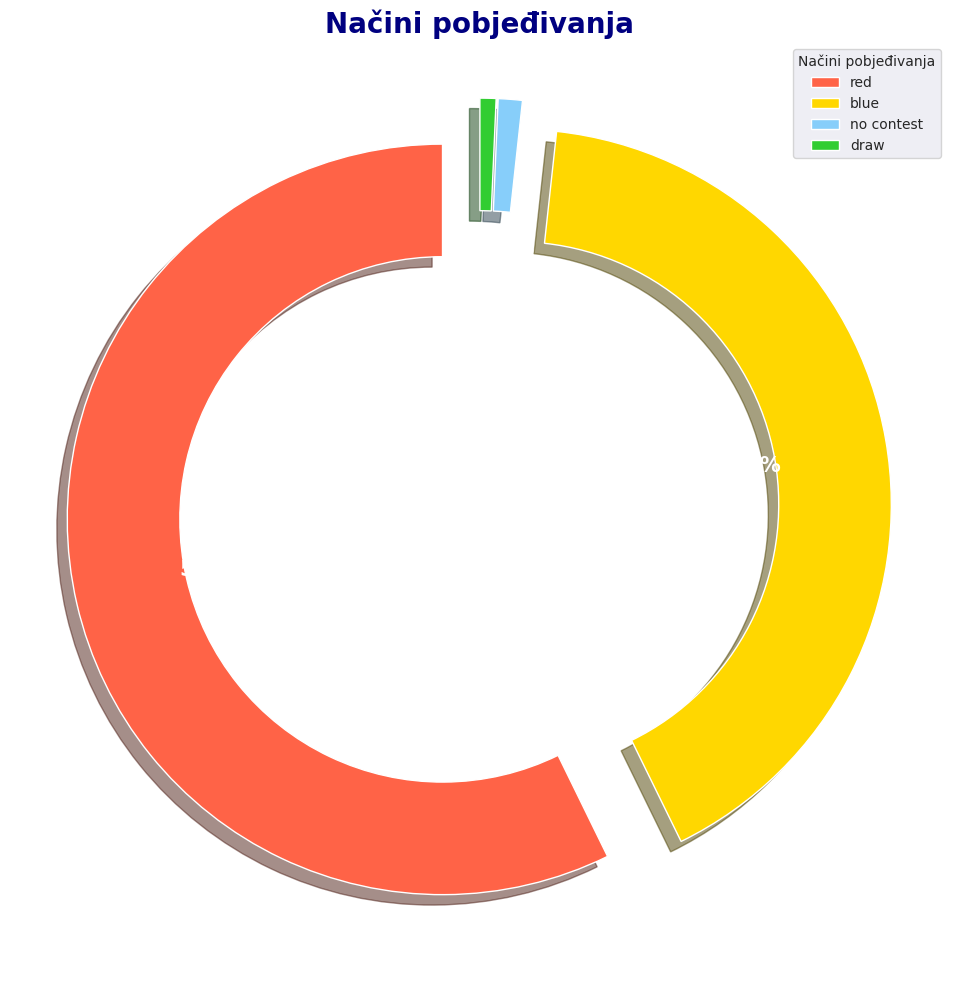

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("data/data.csv")
temp = df["winner"].value_counts()


colors = ['tomato', 'gold', 'lightskyblue', 'limegreen']
explode = (0.1, 0.1, 0.1, 0.1)  
title_font = {'fontname':'sans-serif', 'size':'20', 'color':'navy', 'weight':'bold'}


fig, ax = plt.subplots(figsize=(20,10))
wedges, texts, autotexts = ax.pie(temp.values, 
       labels=temp.index, 
       autopct='%1.2f%%',
       startangle=90, 
       explode=explode, 
       colors=colors,
       shadow=True,
       wedgeprops=dict(width=0.3),
       labeldistance=1.1,
       textprops=dict(color="w"))


plt.setp(autotexts, size=15, weight="bold")
plt.setp(texts, size=12)


plt.title('Načini pobjeđivanja', **title_font)


ax.legend(loc="best", title='Načini pobjeđivanja')

plt.tight_layout()
plt.show()


In [ ]:
print(temp.index)
print(temp)

<Axes: xlabel='B_Age', ylabel='Count'>

<Axes: xlabel='R_Age', ylabel='Count'>

Text(0.5, 0, 'Age of Fighter in Blue Corner')

Text(0, 0.5, 'Number of Winners')

Text(0.5, 1.0, 'Distribution of Ages for Fighters in Blue Corner')

Text(0.5, 0, 'Age of Fighter in Red Corner')

Text(0, 0.5, 'Number of Winners')

Text(0.5, 1.0, 'Distribution of Ages for Fighters in Red Corner')

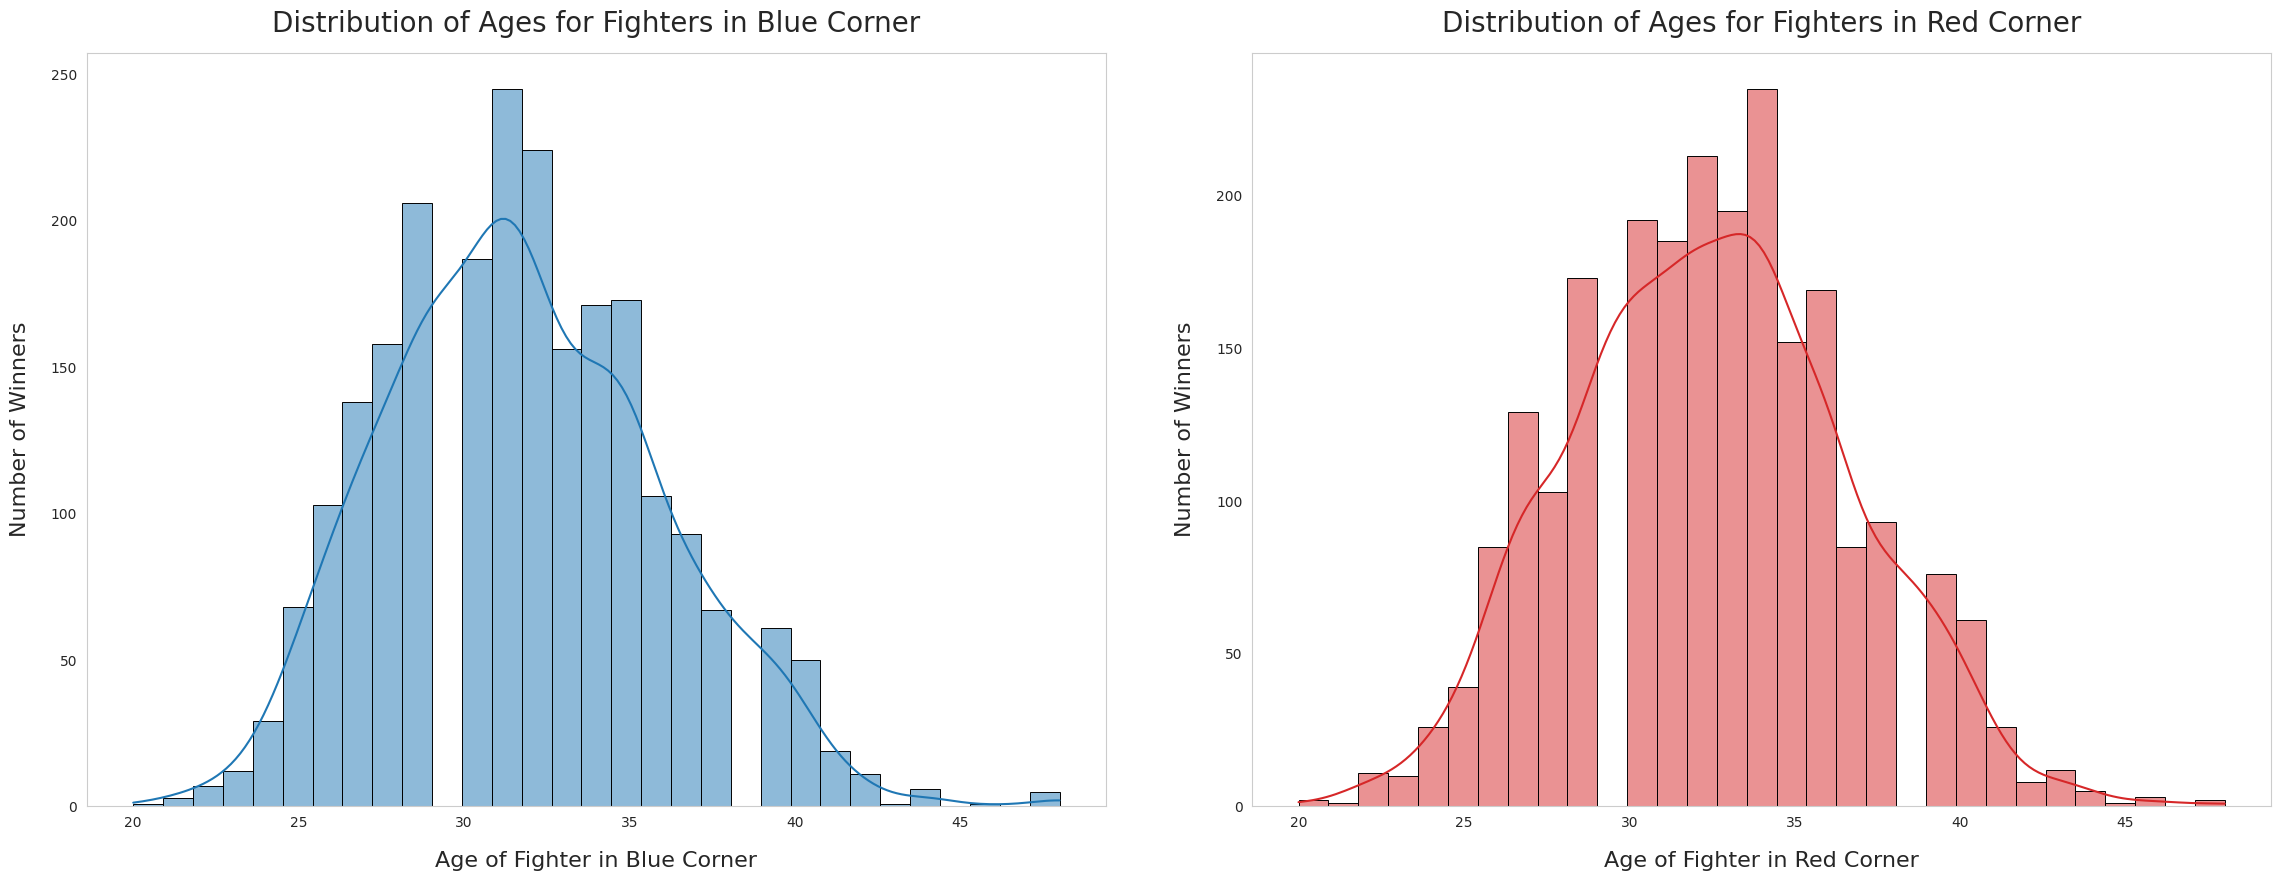

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and customize plot settings
sns.set_style("whitegrid")
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titlepad"] = 25

# Define colors for blue and red fighters
blue_fighter_color = '#1f77b4'
red_fighter_color = '#d62728'

# Read the dataset using Pandas
df = pd.read_csv("data/data.csv")

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(24, 10))


sns.histplot(data=df, x='B_Age', ax=ax[0], color=blue_fighter_color, kde=True, edgecolor='black', linewidth=0.7)


sns.histplot(data=df, x='R_Age', ax=ax[1], color=red_fighter_color, kde=True, edgecolor='black', linewidth=0.7)

# Turn off gridlines for both subplots
ax[0].grid(False)
ax[1].grid(False)

# Customize subplot labels and titles
ax[0].set_xlabel('Age of Fighter in Blue Corner', labelpad=15)
ax[0].set_ylabel('Number of Winners', labelpad=15)
ax[0].set_title('Distribution of Ages for Fighters in Blue Corner', pad=15)

ax[1].set_xlabel('Age of Fighter in Red Corner', labelpad=15)
ax[1].set_ylabel('Number of Winners', labelpad=15)
ax[1].set_title('Distribution of Ages for Fighters in Red Corner', pad=15)

# Adjust layout and display the plot
plt.tight_layout(pad=5)
plt.show()


B_Age
31.00    245
32.00    224
29.00    206
30.00    187
35.00    173
34.00    171
28.00    158
33.00    156
27.00    138
36.00    106
Name: winner, dtype: int64

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 27 artists>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Number of Winners')

Text(0.5, 1.0, 'Distribution of Winners by Age')

(array([15., 20., 25., 30., 35., 40., 45., 50.]),
 [Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45'),
  Text(50.0, 0, '50')])

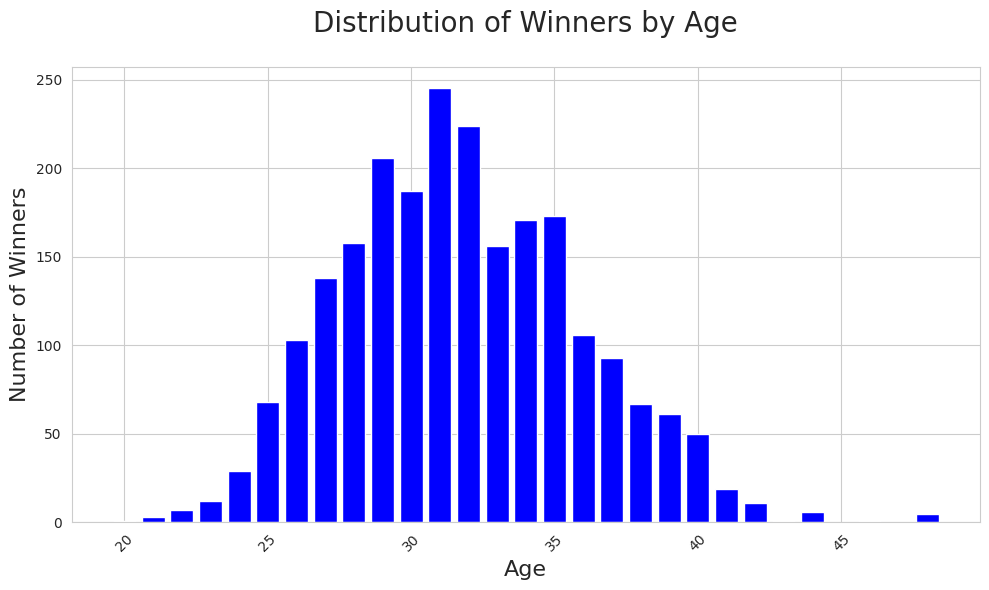

In [28]:
import matplotlib.pyplot as plt


# Sorting the data in descending order
BAge = df.groupby(['B_Age']).count()['winner']
BlueAge = BAge.sort_values(axis=0, ascending=False)
BlueAge.head(10)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(BlueAge.index, BlueAge.values, color='blue')
plt.xlabel('Godine')
plt.ylabel('Broj pobjednika')
plt.title('Distribucija pobjednika po starosti plavog borca')
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

BAge = df.groupby(['R_Age']).count()['winner']
BlueAge = BAge.sort_values(axis=0, ascending=False)
BlueAge.head(10)


plt.figure(figsize=(10, 6))
plt.bar(BlueAge.index, BlueAge.values, color='red')
plt.xlabel('Godine')
plt.ylabel('Broj pobjednika')
plt.title('Distribucija pobjednika po starosti crvenog borca')
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the plot
plt.show()


<Figure size 1800x900 with 0 Axes>

<Axes: xlabel='B_Weight'>

Text(0.5, 1.0, 'Sum of Clinch Strikes Landed by Weight Class')

Text(0.5, 0, 'Weight Class')

Text(0, 0.5, 'Total Strikes Landed')

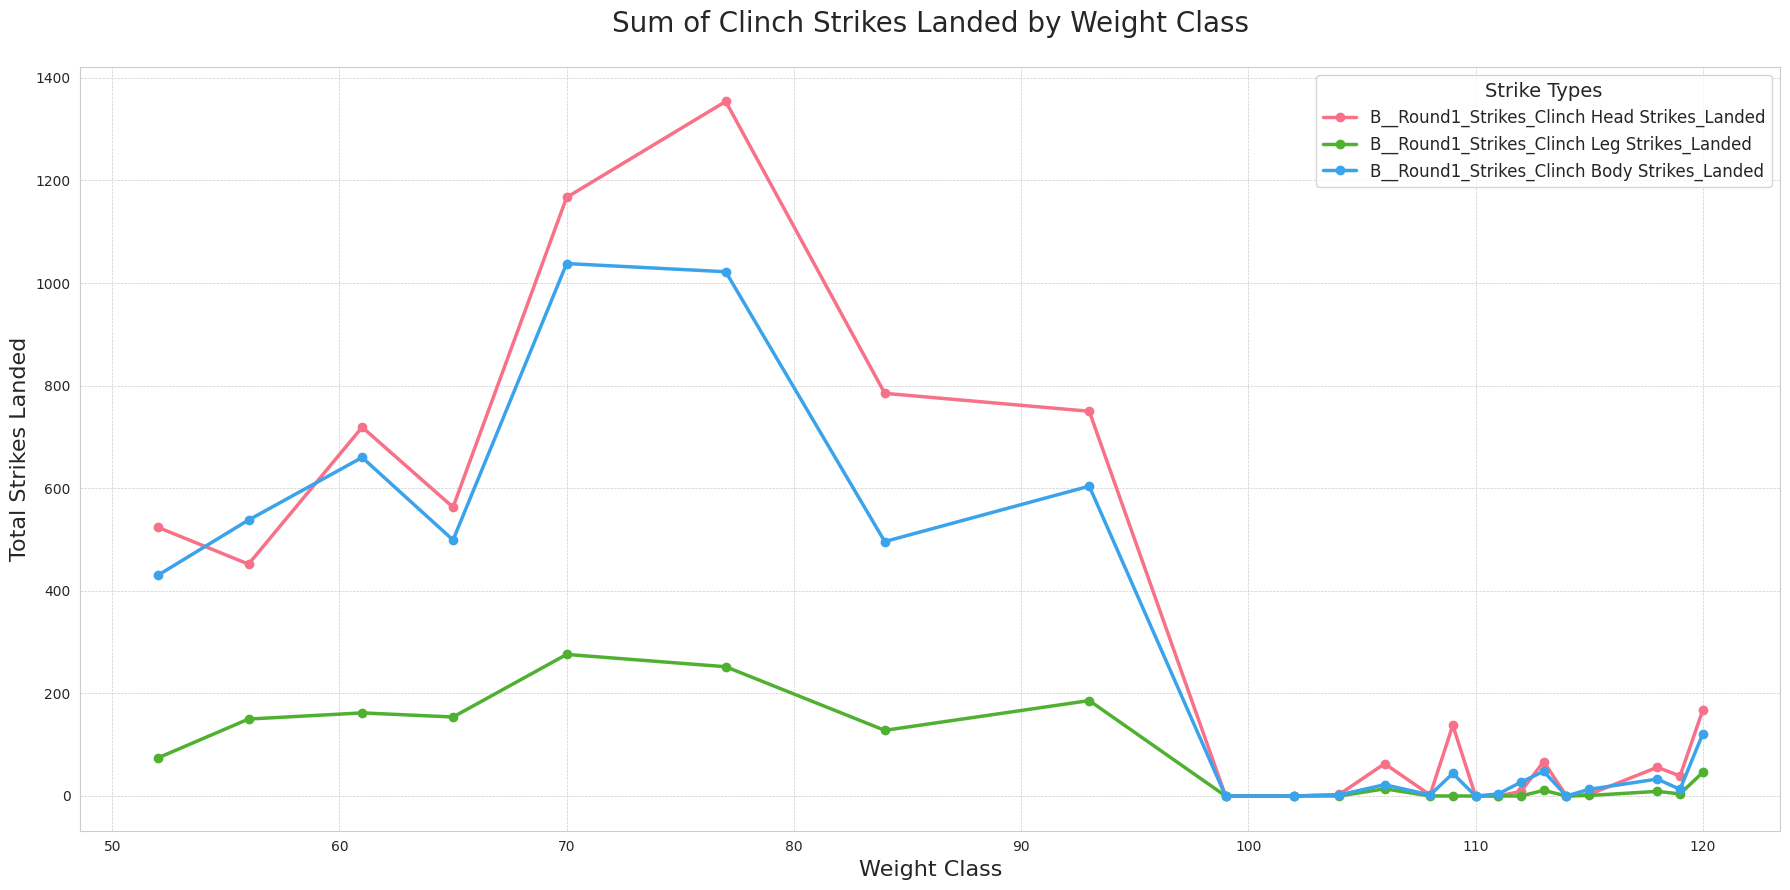

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("data/data.csv")

# Group and sum based on the 'B_Weight' column
strk1 = df[['B_Weight', 
            'B__Round1_Strikes_Clinch Head Strikes_Landed', 
            'B__Round1_Strikes_Clinch Leg Strikes_Landed', 
            'B__Round1_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()


palette = sns.color_palette("husl", 3)

plt.figure(figsize=(18,9))
strk1.plot(ax=plt.gca(), color=palette, marker='o', linestyle='-', linewidth=2.5)
plt.title("Sum of Clinch Strikes Landed by Weight Class", fontsize=20)
plt.xlabel("Weight Class", fontsize=16)
plt.ylabel("Total Strikes Landed", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Strike Types", fontsize=12, title_fontsize=14)
plt.tight_layout()

plt.show()


<Figure size 1800x900 with 0 Axes>

<Axes: xlabel='B_Weight'>

Text(0.5, 1.0, 'Sum of Clinch Strikes Landed by Weight Class')

Text(0.5, 0, 'Weight Class')

Text(0, 0.5, 'Total Strikes Landed')

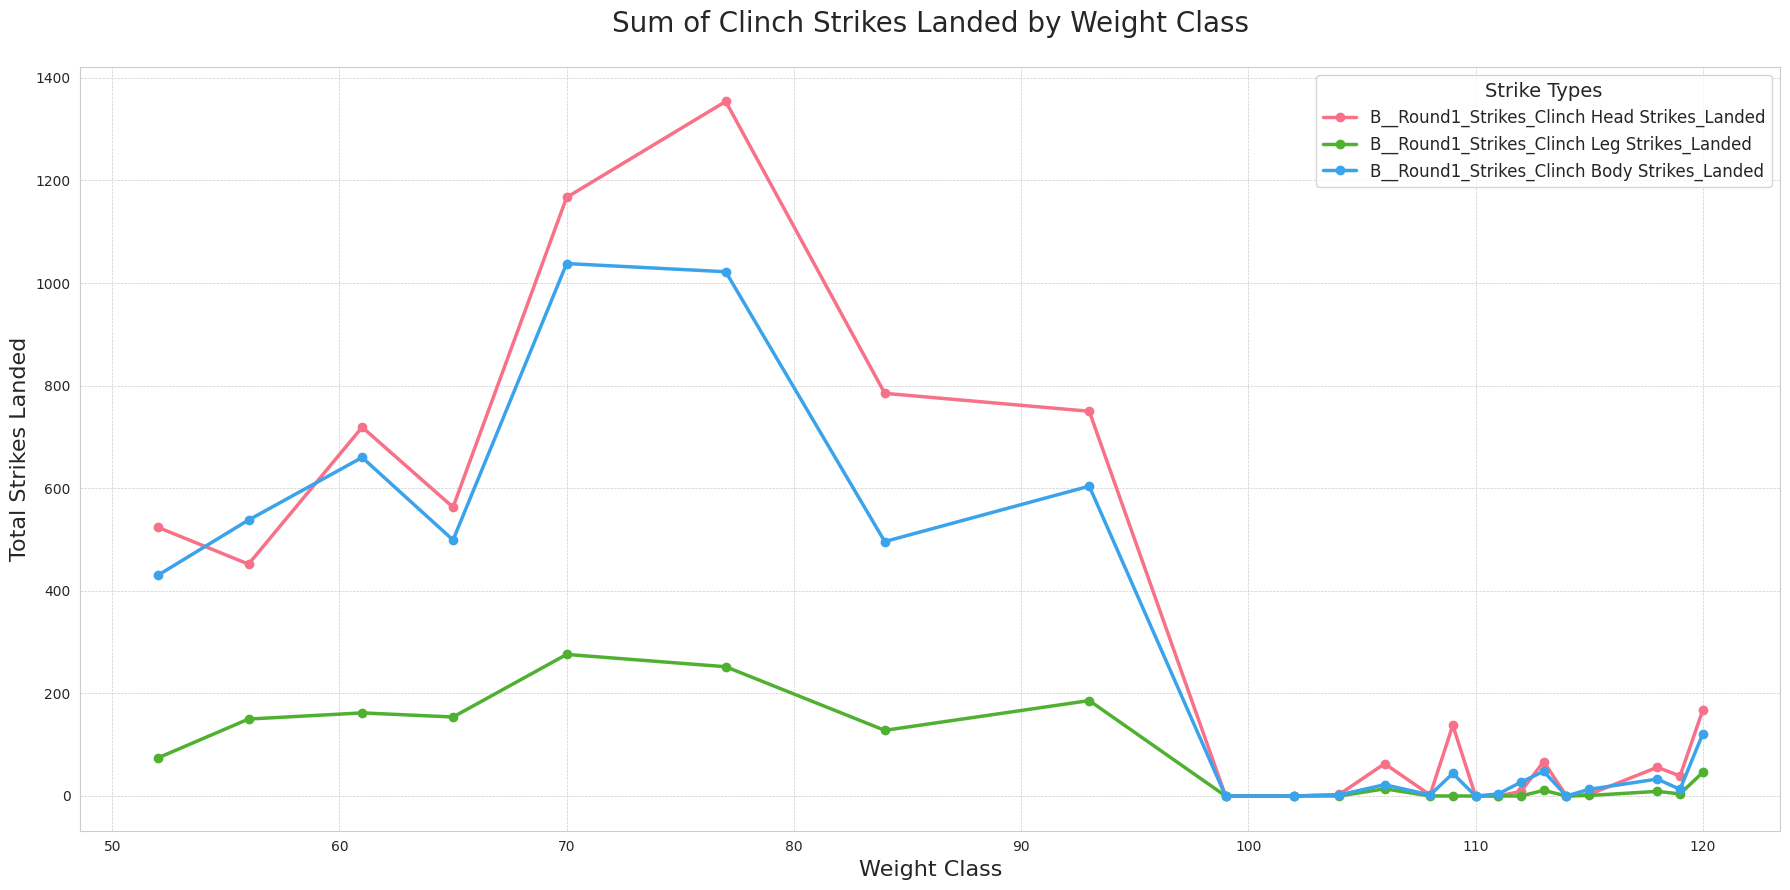

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("data/data.csv")

# Group and sum based on the 'B_Weight' column
strk5 = df[['B_Weight', 'B__Round5_Strikes_Clinch Head Strikes_Landed', 'B__Round5_Strikes_Clinch Leg Strikes_Landed', 'B__Round5_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()



palette = sns.color_palette("husl", 3)

plt.figure(figsize=(18,9))
strk1.plot(ax=plt.gca(), color=palette, marker='o', linestyle='-', linewidth=2.5)
plt.title("Sum of Clinch Strikes Landed by Weight Class", fontsize=20)
plt.xlabel("Weight Class", fontsize=16)
plt.ylabel("Total Strikes Landed", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Strike Types", fontsize=12, title_fontsize=14)
plt.tight_layout()

plt.show()

/home/avulic/miniconda3/envs/foi/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


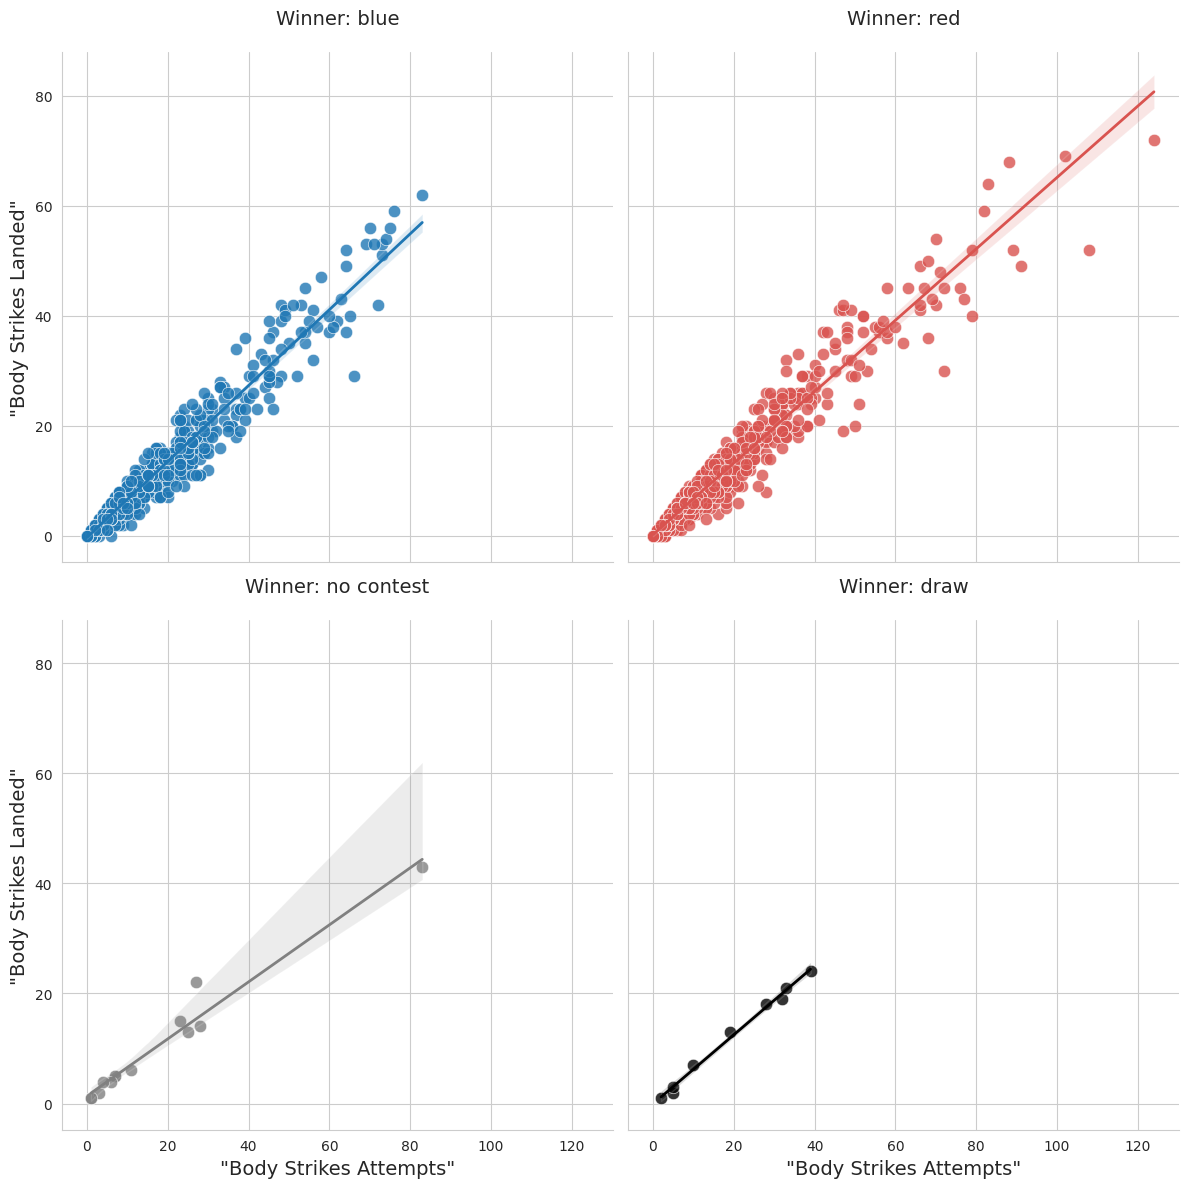

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.titlepad"] = 20
plt.rcParams["figure.autolayout"] = True

palette = {
    "blue": "#1f77b4",  # a clearer blue
    "red": "#d9534f",   # a brighter red
    "no contest": "gray",
    "draw": "black"
}

# Use lmplot to create scatter plots with linear regression fits
g = sns.lmplot(
    x="B__Round1_Strikes_Body Significant Strikes_Attempts",
    y="B__Round1_Strikes_Body Significant Strikes_Landed",
    col="winner",
    hue="winner",
    data=df,
    col_wrap=2,
    height=6,
    palette=palette,
    scatter_kws={'edgecolor': 'w', 'linewidth': 0.5, 's': 80},
    line_kws={'lw': 2}
)


g.set_axis_labels('"Body Strikes Attempts"', '"Body Strikes Landed"')
g.set_titles("Winner: {col_name}")

plt.show()


<Figure size 1200x900 with 0 Axes>

Text(0.5, 1.0, "Top Correlated Features with 'Winner'")

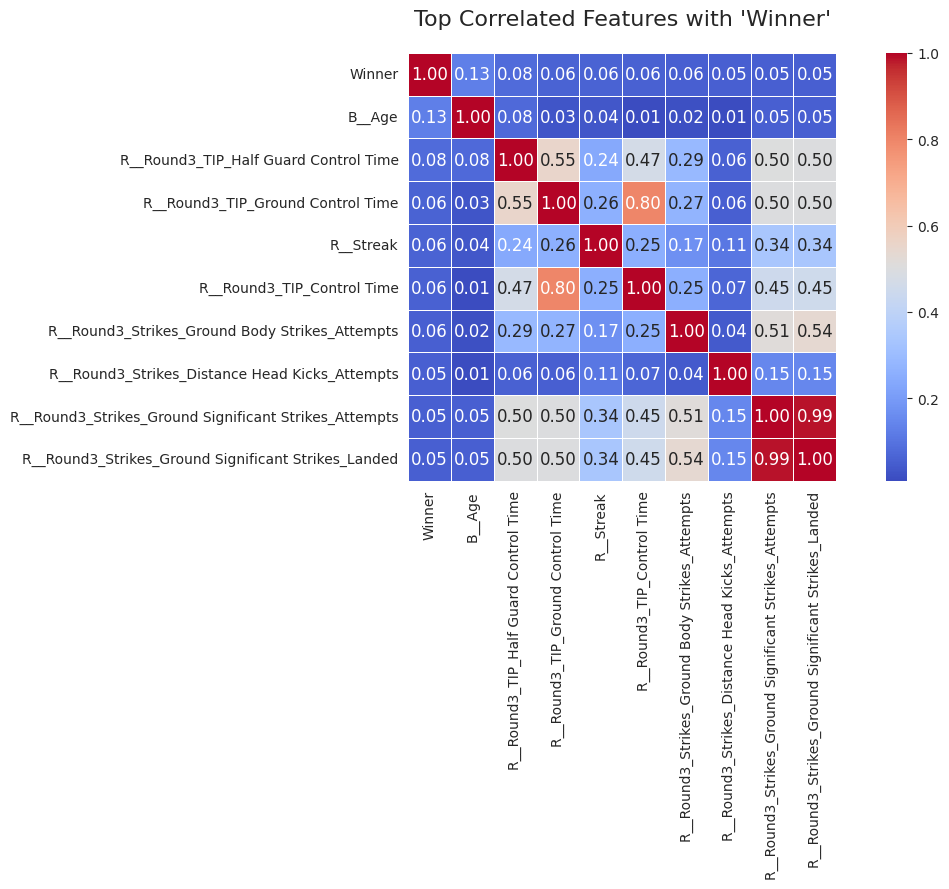

[[1.         0.12793969 0.08272664 0.06258079 0.06080269 0.05940987
  0.05530677 0.05450213 0.05228817 0.05220307]
 [0.12793969 1.         0.07678715 0.03163274 0.03592216 0.00933543
  0.02058281 0.01034642 0.05365961 0.05319354]
 [0.08272664 0.07678715 1.         0.55483706 0.23878035 0.46798899
  0.28967373 0.05696536 0.50381676 0.49706672]
 [0.06258079 0.03163274 0.55483706 1.         0.25930667 0.79505776
  0.27125433 0.05500089 0.49853804 0.4989392 ]
 [0.06080269 0.03592216 0.23878035 0.25930667 1.         0.25492729
  0.16990933 0.10774621 0.33661739 0.33645346]
 [0.05940987 0.00933543 0.46798899 0.79505776 0.25492729 1.
  0.2533852  0.0691328  0.45028655 0.45256147]
 [0.05530677 0.02058281 0.28967373 0.27125433 0.16990933 0.2533852
  1.         0.04333207 0.51412732 0.5380403 ]
 [0.05450213 0.01034642 0.05696536 0.05500089 0.10774621 0.0691328
  0.04333207 1.         0.14548679 0.14806303]
 [0.05228817 0.05365961 0.50381676 0.49853804 0.33661739 0.45028655
  0.51412732 0.1454867

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/data_edited.csv")

k = 10
corrmat = df.corr()
top_k_corr_features = corrmat.nlargest(k, 'Winner')['Winner'].index
cm = np.corrcoef(df[top_k_corr_features].values.T)

# Enhanced heatmap aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(12, 9))
hm = sns.heatmap(
    cm,
    cmap="coolwarm",
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 12},
    yticklabels=top_k_corr_features,
    xticklabels=top_k_corr_features,
    linewidths=.5
)


plt.title("Top Correlated Features with 'Winner'")
plt.show()

print(cm)
print(top_k_corr_features.values)
